In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import metrics
s = pd.read_csv("waltrain.csv", delimiter=",")

In [59]:
print(s)


    Year  Month  Day  Week  Sum of Weekly_Sales
0   2010      2    5     1          49750740.50
1   2010      2   12     2          48336677.63
2   2010      2   19     3          48276993.78
3   2010      2   26     4          43968571.13
4   2010      3    5     5          46871470.30
5   2010      3   12     6          45925396.51
6   2010      3   19     7          44988974.64
7   2010      3   26     8          44133961.05
8   2010      4    2     9          50423831.26
9   2010      4    9    10          47365290.44
10  2010      4   16    11          45183667.08
11  2010      4   23    12          44734452.56
12  2010      4   30    13          43705126.71
13  2010      5    7    14          48503243.52
14  2010      5   14    15          45330080.20
15  2010      5   21    16          45120108.06
16  2010      5   28    17          47757502.56
17  2010      6    4    18          50188543.12
18  2010      6   11    19          47826546.72
19  2010      6   18    20          4762

In [60]:

# sorting data with respect to date
final_data = s.sort_values(by='Week')


In [61]:
x = final_data.iloc[:, 3:4].values  
y = final_data.iloc[:, 4].values 
print(x)
print(y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]]
[49750740.5  48336677.63 48276993.78 43968571.13 46871470.3  45925396.51
 44988974.64 44133961.05 50423831.26 47365290.44 45183667.08 44734452.56
 43705126.71 48503243.52 45330080.2  45120108.06 47757502.56 50188543.12
 47826546.72 47622046.23 46609036.29 48917484.5  47899529.37 46243899.58
 44888849.11 44630363.42 48204999.12 46464418.41 47060952.92 45909740.44
 47194257.61 45634397.84 43080726.51 41358514.41 42239875.87 45102974.23
 43149473.45 43066669.52 43602830.95 45781981.89 46124800.83 45125584.18
 65821003.24 49909027.88 55666770.39 61820799.85 80931415.6  40432519.  ]


In [98]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 150, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x, y)   

C:\Users\chitr\miniconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [99]:
x= x.reshape(-1, 1)
y= y.reshape(-1, 1)
y_pred = regressor.predict(x)  # test the output by changing values 


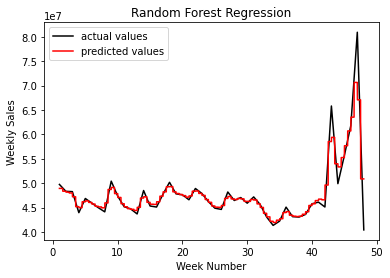

In [100]:
# Visualising the Random Forest Regression results 
  
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(x), max(x), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 

   
ax = plt.subplot()
#original data plot
ax.plot(x,y,label="actual values",color="black")
# plot predicted data 
ax.plot(X_grid,regressor.predict(X_grid),label="predicted values",color="red")
ax.legend()    
plt.title('Random Forest Regression') 
plt.xlabel('Week Number') 
plt.ylabel('Weekly Sales') 
plt.show()

In [101]:
print(metrics.mean_absolute_error(y,y_pred))
print(metrics.mean_squared_error(y,y_pred))
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))
accuracy = regressor.score(x,y)
print((accuracy*100),"%")

1184374.7846652672
6385199388268.277
2526895.207219381
85.09078735536829 %


In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5,n_jobs=2)
knn.fit(x,y)
y_pred = knn.predict(x)
print(y_pred)

[[47440890.668     ]
 [47440890.668     ]
 [47440890.668     ]
 [46675821.87      ]
 [46006281.272     ]
 [45177674.726     ]
 [46468726.752     ]
 [46567490.77999999]
 [46419144.89399999]
 [46368240.478     ]
 [46282473.61      ]
 [45898356.062     ]
 [45491314.014     ]
 [45478602.21      ]
 [46083212.21      ]
 [47379895.492     ]
 [47244556.13200001]
 [47702949.338     ]
 [48000734.984     ]
 [48232731.372     ]
 [47774928.62199999]
 [47458399.194     ]
 [46911759.77      ]
 [46516025.196     ]
 [46373528.12      ]
 [46086505.928     ]
 [46249916.596     ]
 [46454094.862     ]
 [46966873.7       ]
 [46452753.444     ]
 [45776015.064     ]
 [44635527.362     ]
 [43901554.448     ]
 [43483297.772     ]
 [42986312.89399999]
 [42983501.49600001]
 [43432364.80400001]
 [44140786.008     ]
 [44345151.32799999]
 [44740373.47400001]
 [49291240.21800001]
 [50552479.60399999]
 [52529437.304     ]
 [55668637.108     ]
 [62829803.392     ]
 [57752106.54400001]
 [57752106.54399999]
 [57752106.54

C:\Users\chitr\miniconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


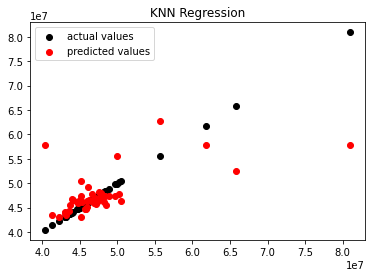

In [84]:
plt.title('KNN Regression') 
ax = plt.subplot()
ax.scatter(y,y,label="actual values",color="black")
ax.scatter(y,y_pred,label="predicted values",color="red")
ax.legend()
plt.show()




In [85]:
print(metrics.mean_absolute_error(y,y_pred))
print(metrics.mean_squared_error(y,y_pred))
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))
accuracy = knn.score(x,y)
print((accuracy*100),"%")

2735826.8250416657
26074376981170.906
5106307.568211193
39.117260503591055 %
